In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('../input/feedback-prize-english-language-learning/train.csv')
df_test = pd.read_csv('../input/feedback-prize-english-language-learning/test.csv')
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [3]:
df_train.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
df_train.loc[df_train['full_text'].str.contains('\n', case=False)]

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3905,FFCDB2524616,"I agree with Ralph Waldo Emerson's ""\n\nTo be ...",2.5,3.0,3.0,4.0,3.5,3.0
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5


In [5]:
df_train['full_text'].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 
df_test['full_text'].replace(r'\s+|\\n', ' ', regex=True, inplace=True)
df_train['full_text'].replace(r'\\', '', regex=True, inplace=True) 
df_test['full_text'].replace(r'\\', '', regex=True, inplace=True)


In [6]:
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal If u change the school policy ...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [7]:
df_train.loc[df_train['full_text'].str.contains("", case=False)]

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal If u change the school policy ...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5


In [8]:
df_train['full_text'][3]

'The best time in life is when you become yourself. I agree that the greatest accomplishment, is when you be yourself in a world that constantly trying to make you something else. Because you make your own choices, you become more happy, and you respect others. First, you make your own choices by being yourself. Becoming yourself means that you should be able to make your own choices and not be shy or afraid of what you\'re doing. Because you\'re defining yourself by doing those things that you want. Some people follow others, therefore, they don\'t make their own choices. People are afraid to make their own choice because they don\'t want to get rejected or be wrong. In this world, most of the teenagers act and follow the people who are strong and bullies. The reason they follow them and make the same choices they make, is because they\'re afraid that they will get beaten up and be left out. Personally when I came to the United States I used to follow other, because I thought they wer

In [9]:
df_train.isnull().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

In [10]:
df_train['avg_word_length'] = df_train['full_text'].str.len()/df_train['full_text'].str.count(' ')
df_test['avg_word_length'] = df_train['full_text'].str.len()/df_test['full_text'].str.count(' ')

In [11]:
df_train['avg_word_length'].describe()

count    3911.000000
mean        5.348991
std         0.293743
min         4.336538
25%         5.148543
50%         5.340081
75%         5.530401
max         6.714961
Name: avg_word_length, dtype: float64

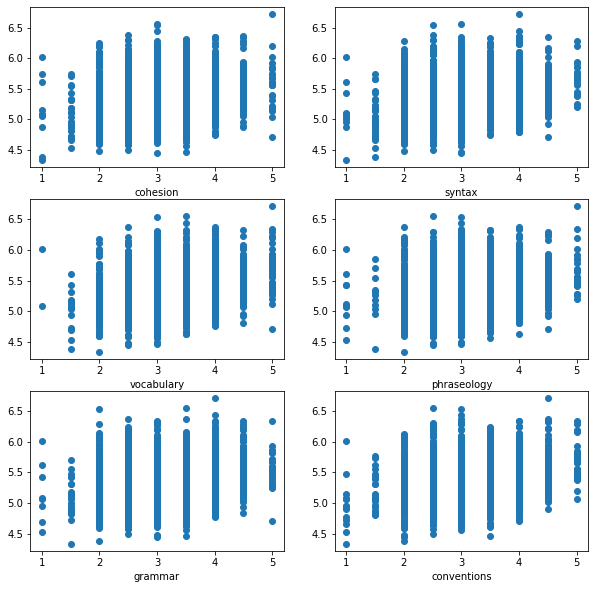

In [12]:
df_train_res = df_train[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]
plt.figure(figsize=(10, 10))
for i, column in enumerate(df_train_res):
    plt.subplot(3, 2, i + 1)
    plt.scatter(df_train_res[column], df_train['avg_word_length'])
    plt.xlabel(column)
plt.show()

<AxesSubplot:>

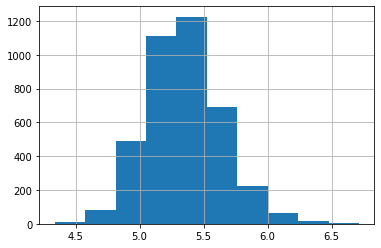

In [13]:
df_train['avg_word_length'].hist()

In [14]:
article_sum = df_train['full_text'].str.count(' a ') + df_train['full_text'].str.count(' an ') + df_train['full_text'].str.count(' the ')
article_sum += df_train['full_text'].str.count(' A ') + df_train['full_text'].str.count(' An ') + df_train['full_text'].str.count(' The ')
df_train['avg_article'] = article_sum/df_train['full_text'].str.count(' ')

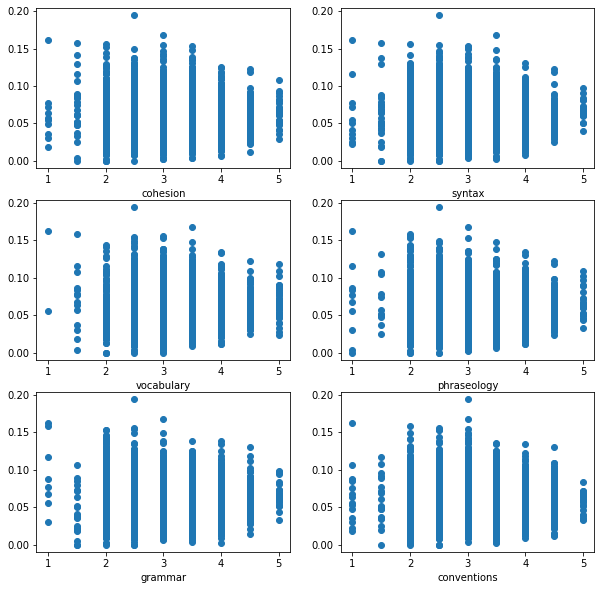

In [15]:
df_train_res = df_train[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]
plt.figure(figsize=(10, 10))
for i, column in enumerate(df_train_res):
    plt.subplot(3, 2, i + 1)
    plt.scatter(df_train_res[column], df_train['avg_article'])
    plt.xlabel(column)
plt.show()

<AxesSubplot:>

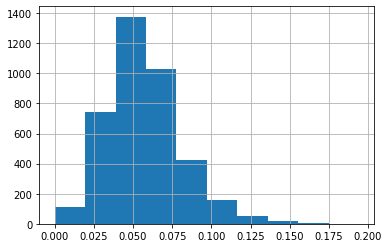

In [16]:
df_train['avg_article'].hist()

In [17]:
df_train[df_train.avg_word_length >= 6.5]

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,avg_word_length,avg_article
376,1CB9668F242D,There are so many enjoyable ways to spend time...,3.0,3.0,3.5,2.5,3.5,2.5,6.560109,0.051913
1472,71F1B96A18BB,"In most student's summer time,they learn diffe...",3.0,2.5,3.0,3.0,2.0,3.0,6.540268,0.057047
2519,BB240E6FF61F,Since the early societies with important philo...,5.0,4.0,5.0,5.0,4.0,4.5,6.714961,0.108661


In [18]:
df_train['full_text'][2519]

'Since the early societies with important philosophers such as Aristotle and Confucius, the world have been in a complex debate arguing about the best way to influence other people. As result, several ideas about how to influence people emerged, such as an internal agreement through the creation of the early constitution in Athens by Aristotle. Early constitution which tried to combat the earliest authoritarian ways to influence people through force. However, those ways to influence people were not effective because those factors dictate the people\'s actions and created a hostile environment. Therefore, the best way to influence others is by our own behavior setting a good example because this generates stability, creates higher standards, and effectiveness. Henceforth, setting a good example generates stability because this do not create a patron of dictatorship that generate differences and hostilities between the relationship follower-influencer. As result, this factor create an id

In [19]:
df_train_syntax = df_train.copy(deep=True)

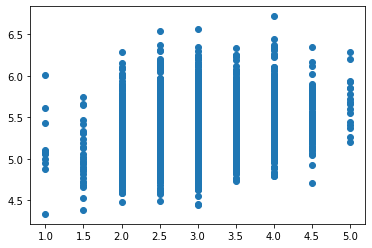

In [20]:
plt.scatter(df_train_syntax['syntax'], df_train_syntax['avg_word_length'])
plt.show()

In [21]:
df_train_syntax = df_train_syntax[df_train_syntax.avg_word_length <= 6.5]
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_word_length >= 6.0) & (df_train_syntax.syntax == 5.0)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_word_length <= 5.0) & (df_train_syntax.syntax == 4.5)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_word_length >= 6.2) & (df_train_syntax.syntax == 4.5)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_word_length <= 4.5) & (df_train_syntax.syntax == 3.0)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_word_length <= 4.5) & (df_train_syntax.syntax == 2.5)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_word_length >= 6.2) & (df_train_syntax.syntax == 2.5)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_word_length <= 4.5) & (df_train_syntax.syntax == 2.0)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_word_length >= 6.2) & (df_train_syntax.syntax == 2.0)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_word_length <= 4.6) & (df_train_syntax.syntax == 1.5)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_word_length >= 5.5) & (df_train_syntax.syntax == 1.5)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_word_length <= 4.5) & (df_train_syntax.syntax == 1.0)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_word_length >= 5.2) & (df_train_syntax.syntax == 1.0)].index)

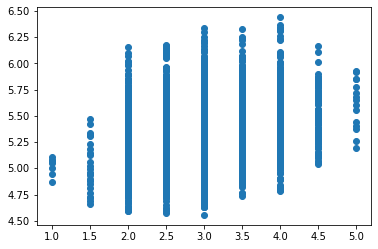

In [22]:
plt.scatter(df_train_syntax['syntax'], df_train_syntax['avg_word_length'])
plt.show()

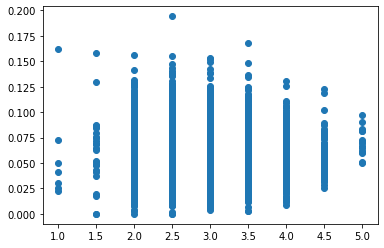

In [23]:
plt.scatter(df_train_syntax['syntax'], df_train_syntax['avg_article'])
plt.show()

In [24]:
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_article >= 0.1) & (df_train_syntax.syntax == 1.0)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_article <= 0.012) & (df_train_syntax.syntax == 1.5)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_article >= 0.12) & (df_train_syntax.syntax == 1.5)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_article >= 0.17) & (df_train_syntax.syntax == 2.5)].index)
df_train_syntax = df_train_syntax.drop(df_train_syntax[(df_train_syntax.avg_article >= 0.15) & (df_train_syntax.syntax == 3.5)].index)

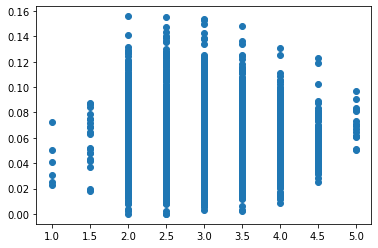

In [25]:
plt.scatter(df_train_syntax['syntax'], df_train_syntax['avg_article'])
plt.show()

In [26]:
df_train_syntax

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,avg_word_length,avg_article
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,5.252874,0.038314
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,4.943609,0.054511
2,00299B378633,"Dear, Principal If u change the school policy ...",3.0,3.5,3.0,3.0,3.0,2.5,5.210031,0.056426
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,5.447802,0.034341
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,5.089744,0.085470
...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,5.435754,0.039106
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,5.596983,0.060345
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,5.050584,0.042802
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,5.547059,0.043137


In [27]:
for column in df_train_res:
    print(column)
    print(df_train[['avg_article', column]].corr().values[0][1])
    print(df_train[['avg_word_length', column]].corr().values[0][1])

cohesion
-0.002755519329873396
0.25480430968169177
syntax
-0.021506274784119355
0.251115909511291
vocabulary
-0.009234240682587668
0.25308625366371007
phraseology
-0.04929393190724378
0.1898887657793914
grammar
-0.05116955476490018
0.1842336495395668
conventions
-0.011908760749145608
0.2607739146360167


In [28]:
df_train_syntax[['full_text', 'syntax']].to_csv('syntax.csv', index=None)

In [29]:
df_train_cohesion = df_train.copy(deep=True)

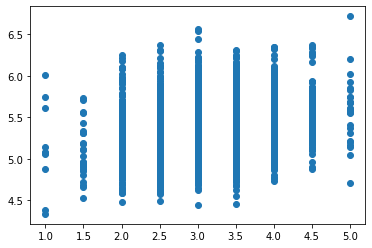

In [30]:
plt.scatter(df_train_cohesion['cohesion'], df_train_cohesion['avg_word_length'])
plt.show()

In [31]:
df_train_cohesion = df_train_cohesion.drop(df_train_cohesion[(df_train_cohesion.avg_word_length >= 6.5) & (df_train_cohesion.cohesion == 5.0)].index)
df_train_cohesion = df_train_cohesion.drop(df_train_cohesion[(df_train_cohesion.avg_word_length <= 4.8) & (df_train_cohesion.cohesion == 5.0)].index)
df_train_cohesion = df_train_cohesion.drop(df_train_cohesion[(df_train_cohesion.avg_word_length >= 5.5) & (df_train_cohesion.cohesion == 1.0)].index)
df_train_cohesion = df_train_cohesion.drop(df_train_cohesion[(df_train_cohesion.avg_word_length <= 4.5) & (df_train_cohesion.cohesion == 1.0)].index)

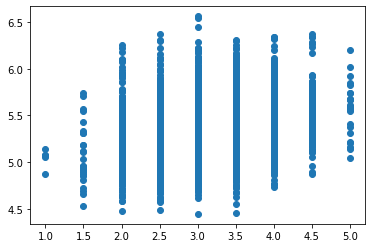

In [32]:
plt.scatter(df_train_cohesion['cohesion'], df_train_cohesion['avg_word_length'])
plt.show()

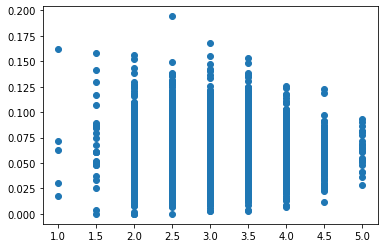

In [33]:
plt.scatter(df_train_cohesion['cohesion'], df_train_cohesion['avg_article'])
plt.show()

In [34]:
df_train_cohesion[(df_train_cohesion.avg_article <= 0.015) & (df_train_cohesion.cohesion == 1.5)]

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,avg_word_length,avg_article
1327,65B7FDE783F2,"I am student for Generic_School,I have work af...",1.5,2.0,1.5,1.0,1.5,2.0,5.115942,0.004141
3257,E2E3D86A8CF8,"based on you experience , do you agree or disa...",1.5,1.5,2.0,2.0,1.5,1.5,5.310056,0.000000


In [35]:
df_train_cohesion = df_train_cohesion.drop(df_train_cohesion[(df_train_cohesion.avg_article >= 0.15) & (df_train_cohesion.cohesion == 1.0)].index)
df_train_cohesion = df_train_cohesion.drop(df_train_cohesion[(df_train_cohesion.avg_article <= 0.015) & (df_train_cohesion.cohesion == 1.5)].index)
df_train_cohesion = df_train_cohesion.drop(df_train_cohesion[(df_train_cohesion.avg_article >= 0.125) & (df_train_cohesion.cohesion == 1.5)].index)
df_train_cohesion = df_train_cohesion.drop(df_train_cohesion[(df_train_cohesion.avg_article >= 0.175) & (df_train_cohesion.cohesion == 2.5)].index)
df_train_cohesion = df_train_cohesion.drop(df_train_cohesion[(df_train_cohesion.avg_article >= 0.11) & (df_train_cohesion.cohesion == 4.5)].index)

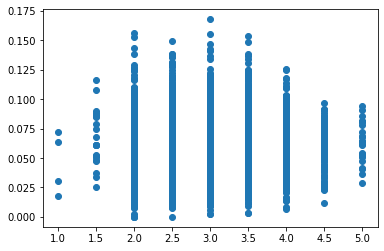

In [36]:
plt.scatter(df_train_cohesion['cohesion'], df_train_cohesion['avg_article'])
plt.show()

In [37]:
df_train_cohesion[['full_text', 'cohesion']].to_csv('cohesion.csv', index=None)

In [38]:
df_train_vocabulary = df_train.copy(deep=True)

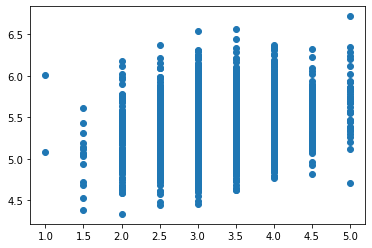

In [39]:
plt.scatter(df_train_vocabulary['vocabulary'], df_train_vocabulary['avg_word_length'])
plt.show()

In [40]:
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_word_length >= 6.0) & (df_train_vocabulary.vocabulary == 1.0)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_word_length >= 6.5) & (df_train_vocabulary.vocabulary == 5.0)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_word_length <= 5.0) & (df_train_vocabulary.vocabulary == 5.0)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_word_length >= 6.5) & (df_train_vocabulary.vocabulary == 2.0)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_word_length <= 4.4) & (df_train_vocabulary.vocabulary == 2.0)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_word_length >= 6.2) & (df_train_vocabulary.vocabulary == 4.5)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_word_length <= 5.0) & (df_train_vocabulary.vocabulary == 4.5)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_word_length >= 5.3) & (df_train_vocabulary.vocabulary == 1.5)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_word_length <= 4.8) & (df_train_vocabulary.vocabulary == 1.5)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_word_length >= 6.4) & (df_train_vocabulary.vocabulary == 3.0)].index)

In [41]:
df_train_vocabulary[(df_train_vocabulary.avg_word_length >= 6.4) & (df_train_vocabulary.vocabulary == 4.5)]

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,avg_word_length,avg_article


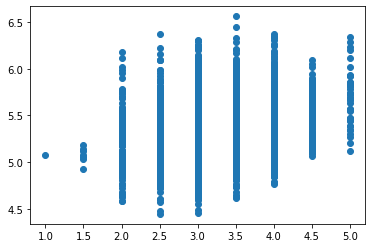

In [42]:
plt.scatter(df_train_vocabulary['vocabulary'], df_train_vocabulary['avg_word_length'])
plt.show()

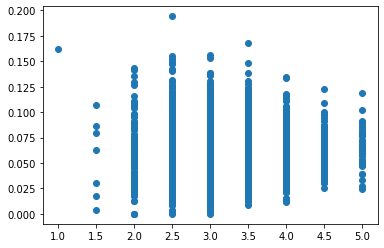

In [43]:
plt.scatter(df_train_vocabulary['vocabulary'], df_train_vocabulary['avg_article'])
plt.show()

In [44]:
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_article >= 0.15) & (df_train_vocabulary.vocabulary == 1.0)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_article >= 0.17) & (df_train_vocabulary.vocabulary == 2.5)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_article >= 0.135) & (df_train_vocabulary.vocabulary == 3.5)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_article >= 0.13) & (df_train_vocabulary.vocabulary == 4.0)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_article >= 0.105) & (df_train_vocabulary.vocabulary == 4.5)].index)
df_train_vocabulary = df_train_vocabulary.drop(df_train_vocabulary[(df_train_vocabulary.avg_article >= 0.1) & (df_train_vocabulary.vocabulary == 5.0)].index)

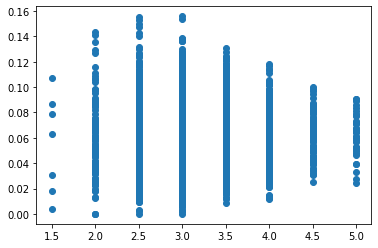

In [45]:
plt.scatter(df_train_vocabulary['vocabulary'], df_train_vocabulary['avg_article'])
plt.show()

In [46]:
df_train_vocabulary[['full_text', 'vocabulary']].to_csv('vocabulary.csv', index=None)

In [47]:
df_train_phraseology = df_train.copy(deep=True)

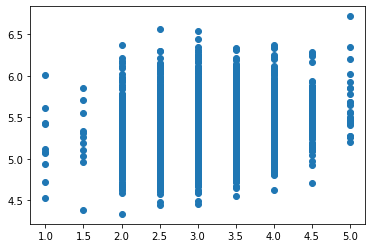

In [48]:
plt.scatter(df_train_phraseology['phraseology'], df_train_phraseology['avg_word_length'])
plt.show()

In [49]:
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_word_length >= 5.5) & (df_train_phraseology.phraseology == 1.0)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_word_length <= 5.0) & (df_train_phraseology.phraseology == 1.0)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_word_length >= 5.5) & (df_train_phraseology.phraseology == 1.5)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_word_length <= 4.5) & (df_train_phraseology.phraseology == 1.5)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_word_length >= 6.3) & (df_train_phraseology.phraseology == 2.0)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_word_length <= 4.5) & (df_train_phraseology.phraseology == 2.0)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_word_length >= 6.3) & (df_train_phraseology.phraseology == 2.5)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_word_length <= 4.8) & (df_train_phraseology.phraseology == 4.0)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_word_length >= 6.0) & (df_train_phraseology.phraseology == 4.5)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_word_length <= 4.8) & (df_train_phraseology.phraseology == 4.5)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_word_length >= 6.0) & (df_train_phraseology.phraseology == 5.0)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_word_length <= 5.3) & (df_train_phraseology.phraseology == 5.0)].index)

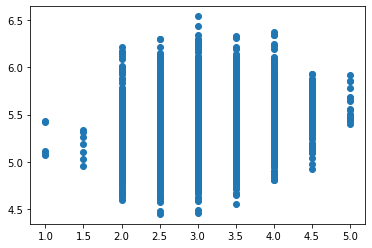

In [50]:
plt.scatter(df_train_phraseology['phraseology'], df_train_phraseology['avg_word_length'])
plt.show()

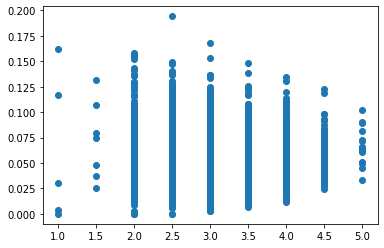

In [51]:
plt.scatter(df_train_phraseology['phraseology'], df_train_phraseology['avg_article'])
plt.show()

In [52]:
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_article >= 0.025) & (df_train_phraseology.phraseology == 1.0)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_article <= 0.05) & (df_train_phraseology.phraseology == 1.5)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_article >= 0.1) & (df_train_phraseology.phraseology == 1.5)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_article >= 0.175) & (df_train_phraseology.phraseology == 2.5)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_article >= 0.15) & (df_train_phraseology.phraseology == 3.0)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_article >= 0.13) & (df_train_phraseology.phraseology == 3.5)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_article >= 0.12) & (df_train_phraseology.phraseology == 4.0)].index)
df_train_phraseology = df_train_phraseology.drop(df_train_phraseology[(df_train_phraseology.avg_article >= 0.11) & (df_train_phraseology.phraseology == 4.5)].index)

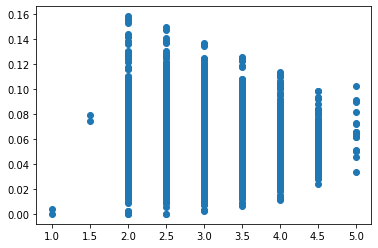

In [53]:
plt.scatter(df_train_phraseology['phraseology'], df_train_phraseology['avg_article'])
plt.show()

In [54]:
df_train_phraseology[['full_text', 'phraseology']].to_csv('phraseology.csv', index=None)

In [55]:
df_train_grammar = df_train.copy(deep=True)

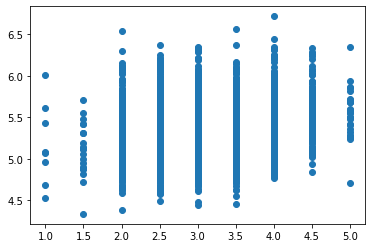

In [56]:
plt.scatter(df_train_grammar['grammar'], df_train_grammar['avg_word_length'])
plt.show()

In [57]:
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length <= 5.0) & (df_train_grammar.grammar == 5.0)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length >= 6.0) & (df_train_grammar.grammar == 5.0)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length >= 6.5) & (df_train_grammar.grammar == 4.0)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length >= 6.3) & (df_train_grammar.grammar == 3.5)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length <= 4.5) & (df_train_grammar.grammar == 3.5)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length <= 4.5) & (df_train_grammar.grammar == 3.0)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length <= 4.5) & (df_train_grammar.grammar == 2.5)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length >= 6.3) & (df_train_grammar.grammar == 2.5)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length <= 4.5) & (df_train_grammar.grammar == 2.0)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length >= 6.2) & (df_train_grammar.grammar == 2.0)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length <= 4.5) & (df_train_grammar.grammar == 1.5)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length >= 5.2) & (df_train_grammar.grammar == 1.5)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length <= 4.7) & (df_train_grammar.grammar == 1.0)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_word_length >= 5.2) & (df_train_grammar.grammar == 1.0)].index)

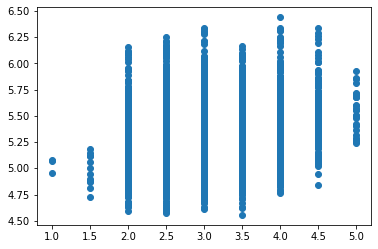

In [58]:
plt.scatter(df_train_grammar['grammar'], df_train_grammar['avg_word_length'])
plt.show()

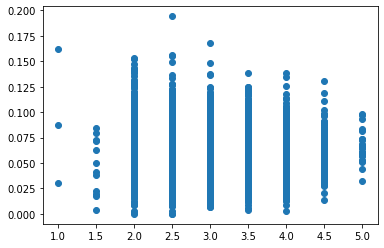

In [59]:
plt.scatter(df_train_grammar['grammar'], df_train_grammar['avg_article'])
plt.show()

In [60]:
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_article >= 0.17) & (df_train_grammar.grammar == 2.5)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_article >= 0.16) & (df_train_grammar.grammar == 3.0)].index)
df_train_grammar = df_train_grammar.drop(df_train_grammar[(df_train_grammar.avg_article >= 0.16) & (df_train_grammar.grammar == 1.0)].index)

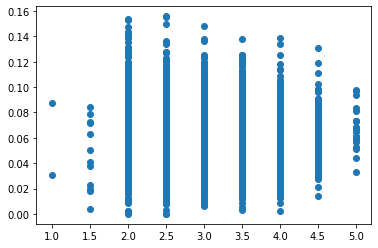

In [61]:
plt.scatter(df_train_grammar['grammar'], df_train_grammar['avg_article'])
plt.show()

In [62]:
df_train_grammar[['full_text', 'grammar']].to_csv('grammar.csv', index=None)

In [63]:
df_train_conventions = df_train.copy(deep=True)

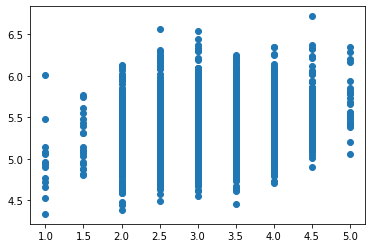

In [64]:
plt.scatter(df_train_conventions['conventions'], df_train_conventions['avg_word_length'])
plt.show()

In [65]:
df_train_conventions = df_train_conventions.drop(df_train_conventions[(df_train_conventions.avg_word_length >= 5.4) & (df_train_conventions.conventions == 1.0)].index)
df_train_conventions = df_train_conventions.drop(df_train_conventions[(df_train_conventions.avg_word_length >= 6.4) & (df_train_conventions.conventions == 2.5)].index)
df_train_conventions = df_train_conventions.drop(df_train_conventions[(df_train_conventions.avg_word_length >= 6.4) & (df_train_conventions.conventions == 4.5)].index)
df_train_conventions = df_train_conventions.drop(df_train_conventions[(df_train_conventions.avg_word_length <= 4.5) & (df_train_conventions.conventions == 3.5)].index)
df_train_conventions = df_train_conventions.drop(df_train_conventions[(df_train_conventions.avg_word_length <= 5.0) & (df_train_conventions.conventions == 5.0)].index)

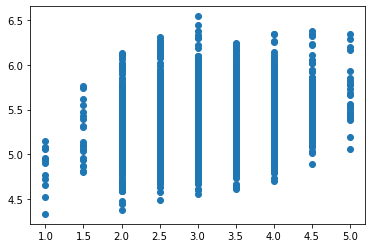

In [66]:
plt.scatter(df_train_conventions['conventions'], df_train_conventions['avg_word_length'])
plt.show()

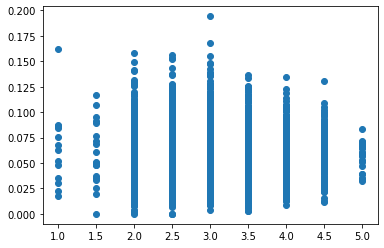

In [67]:
plt.scatter(df_train_conventions['conventions'], df_train_conventions['avg_article'])
plt.show()

In [68]:
df_train_conventions = df_train_conventions.drop(df_train_conventions[(df_train_conventions.avg_article >= 0.15) & (df_train_conventions.conventions == 1.0)].index)
df_train_conventions = df_train_conventions.drop(df_train_conventions[(df_train_conventions.avg_article >= 0.16) & (df_train_conventions.conventions == 3.0)].index)
df_train_conventions = df_train_conventions.drop(df_train_conventions[(df_train_conventions.avg_article >= 0.12) & (df_train_conventions.conventions == 4.5)].index)
df_train_conventions = df_train_conventions.drop(df_train_conventions[(df_train_conventions.avg_article <= 0.01) & (df_train_conventions.conventions == 1.5)].index)

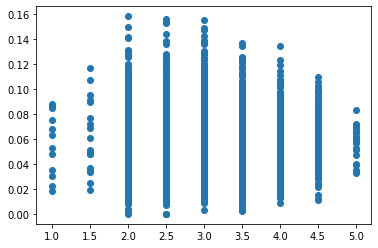

In [69]:
plt.scatter(df_train_conventions['conventions'], df_train_conventions['avg_article'])
plt.show()

In [70]:
df_train_conventions[['full_text', 'conventions']].to_csv('conventions.csv', index=None)